<a href="https://colab.research.google.com/github/PreethamThinagaraj/CE888/blob/main/Project/Fire_Vs_No_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import PIL.Image

Images being read for EDA

In [ ]:
lst_fire_img = glob.glob('/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/*.jpg')
lst_non_fire_img = glob.glob('/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/No_Fire/*.jpg')

In [ ]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with No_fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 25018
Number of images with No_fire : 14357


Class weights

In [ ]:
len(lst_fire_img)/(len(lst_fire_img)+len(lst_non_fire_img))

0.6353777777777778

In [ ]:
len(lst_non_fire_img)/(len(lst_fire_img)+len(lst_non_fire_img))

0.36462222222222224

Random images from the dataset being plotted

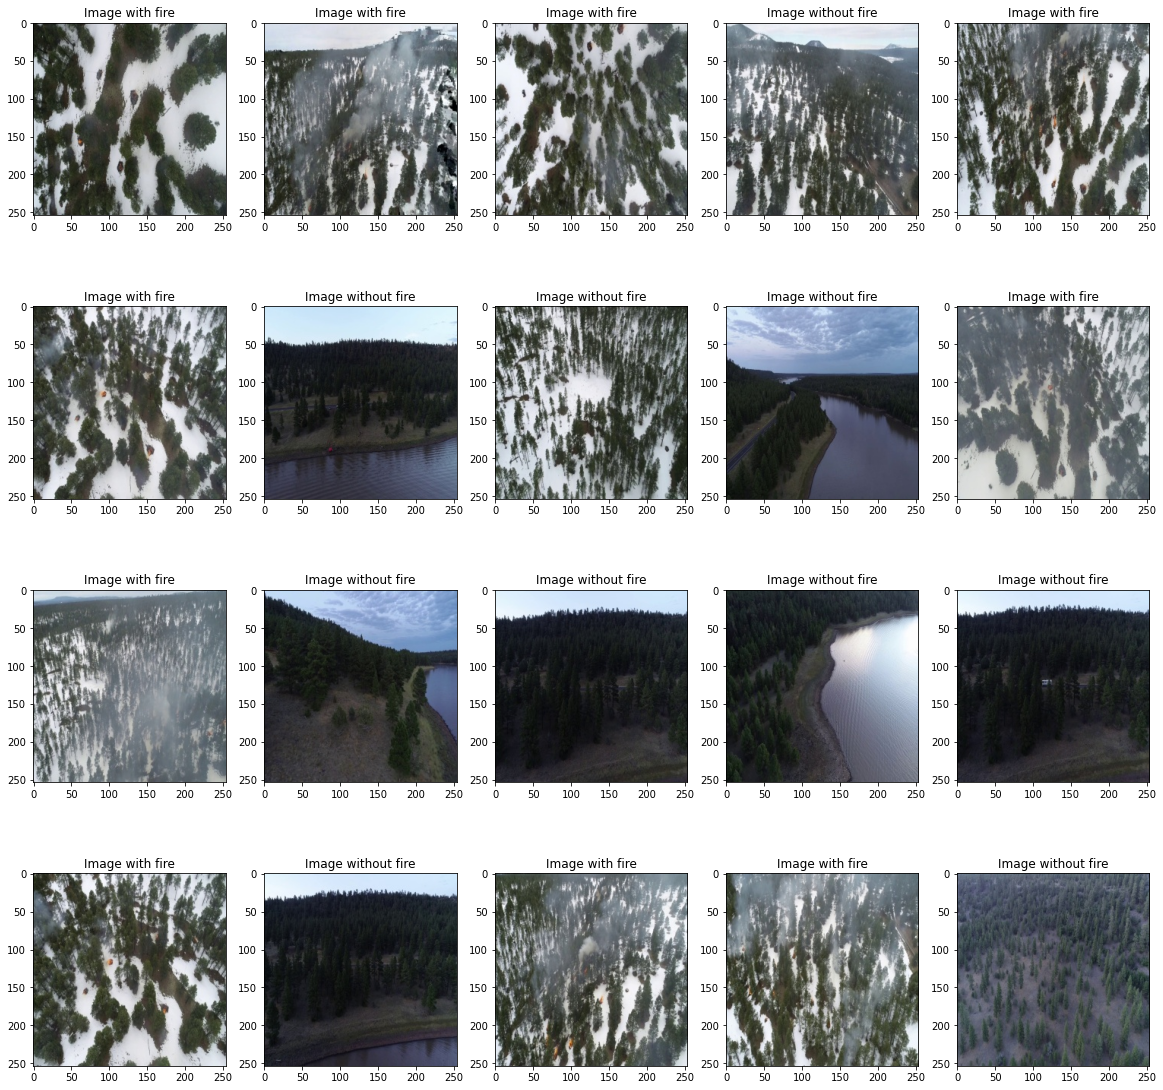

In [ ]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "No_Fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

**Creating a dataframe to plot the class imbalance**

In [ ]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [ ]:
pd.set_option('display.max_colwidth',1000)

In [ ]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/No_Fire/lake_resized_lake_frame4598.jpg,0
1,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame12086.jpg,1
2,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame2762.jpg,1
3,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame26502.jpg,1
4,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame3184.jpg,1
5,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame15579.jpg,1
6,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame9777.jpg,1
7,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame9571.jpg,1
8,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame9048.jpg,1
9,/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/Fire/resized_frame20770.jpg,1


In [ ]:
df.shape

(39375, 2)

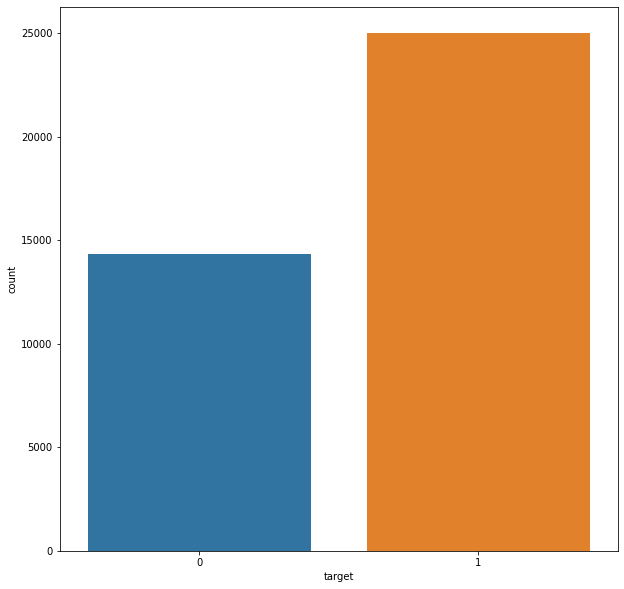

In [ ]:
plt.figure(figsize = (10,10))


sns.countplot(x = "target",data = df)

plt.show()

**Considering a random image to understand the features of the image**

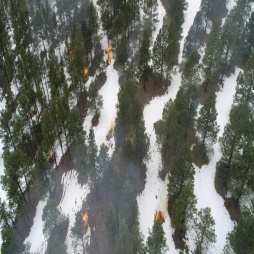

In [ ]:
PIL.Image.open(str(lst_fire_img[1]))

In [ ]:
image = PIL.Image.open(str(lst_fire_img[1]))

width, height = image.size

In [ ]:
print(width, height)

254 254


In [ ]:
image.format

'JPEG'

In [ ]:
image.mode

'RGB'

**Data Augmentation being performed to overcome class imbalance**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],
        validation_split=0.3) # brightness

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Fire - No fire/Training/Training/'

In [ ]:
train_image_gen = training_datagen.flow_from_directory(
                  directory=train_path,
                  target_size=(254, 254), # resize to this size
                  color_mode="rgb", # for coloured images  rgb,   grayscale
                  batch_size=10, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  classes=['No_Fire','Fire'],
                  subset="training",
                  shuffle=True,
                  seed=2000 # to make the result reproducible
                  )

Found 27563 images belonging to 2 classes.


In [ ]:
val_image_gen = training_datagen.flow_from_directory(
                  directory=train_path,
                  target_size=(254, 254), # resize to this size
                  color_mode="rgb", # for coloured images  rgb,   grayscale
                  batch_size=10, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  classes=['No_Fire','Fire'],
                  subset="validation",
                  shuffle=True,
                  seed=2020 # to make the result reproducible
                  )

Found 11812 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

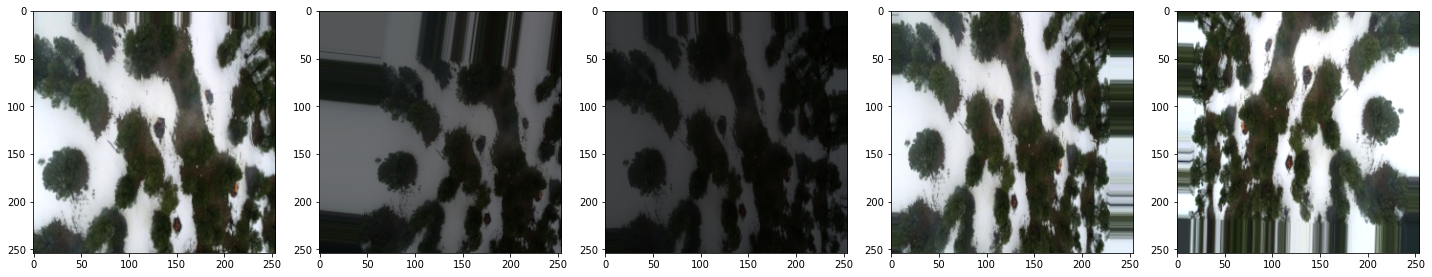

In [ ]:
images_to_show = [train_image_gen[3][0][0] for i in range(5)] # taking 5 images.
plotImages(images_to_show)